# Retrieve the adjacency matrices from dysts

This notebooks showcases how adjacency matrices are retrieved from the `dysts` package for the simplex systems and how they look like.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dysts.flows as flows
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx


from causaldynamics.systems import _DYSTS_3D_CHAOTIC_SYSTEMS, get_adjacency_matrix_from_jac


The `_DYSTS_3D_CHAOTIC_SYSTEMS` dictionary containes all the dynamical system names. We can get the actual `dysts.flows` classes by calling the attribute. Let's have a look at an example: 

In [3]:
sys_name = _DYSTS_3D_CHAOTIC_SYSTEMS[0]
sys = getattr(flows, sys_name)

print(sys_name)
print(sys)


Lorenz
<class 'dysts.flows.Lorenz'>


To get the adjacency matrix from a system, call the `get_adjacency_matrix_from_jac` function: 

In [4]:
A = get_adjacency_matrix_from_jac(sys)
A

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1]])

Let's create a dictionary with all the adjacency matrices of all 3D `dysts` systems.

In [5]:
res = {}
for s in _DYSTS_3D_CHAOTIC_SYSTEMS:
    l = getattr(flows, s)
    A = get_adjacency_matrix_from_jac(l)
    res[s] = A
res


{'Lorenz': array([[1, 1, 0],
        [0, 1, 1],
        [1, 1, 1]]),
 'LorenzBounded': array(1),
 'Lorenz84': array([[1, 1, 1],
        [0, 0, 1],
        [1, 1, 0]]),
 'Rossler': array([[0, 1, 1],
        [1, 1, 0],
        [1, 0, 0]]),
 'Thomas': array([[1, 1, 0],
        [0, 1, 1],
        [1, 0, 1]]),
 'ThomasLabyrinth': array([[1, 1, 0],
        [0, 1, 1],
        [1, 0, 1]]),
 'GlycolyticOscillation': array(1),
 'GuckenheimerHolmes': array(1),
 'Halvorsen': array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]),
 'Chua': array([[1, 1, 0],
        [1, 1, 1],
        [0, 1, 0]]),
 'MultiChua': array(1),
 'Duffing': array([[0, 1, 0],
        [1, 1, 1],
        [0, 0, 0]]),
 'DoubleGyre': array(1),
 'BlinkingRotlet': array(1),
 'LidDrivenCavityFlow': array(1),
 'BlinkingVortex': array(1),
 'InteriorSquirmer': array(1),
 'OscillatingFlow': array(1),
 'BickleyJet': array(1),
 'ArnoldBeltramiChildress': array(1),
 'JerkCircuit': array([[0, 1, 0],
        [0, 0, 1],
        [1, 1, 1]])

Now, we filter out the systems, that do not have a three dimensional adjacency matrix.

In [6]:
# Count systems with valid adjacency matrices
valid_matrices = sum(1 for A in res.values() if isinstance(A, np.ndarray) and A.ndim == 2)
total_systems = len(res)
print(f"Systems with valid adjacency matrices: {valid_matrices}/{total_systems} ({valid_matrices/total_systems:.1%})")


Systems with valid adjacency matrices: 59/104 (56.7%)


Let's have a look at the network densities, i.e., the ratio of actual connections to possible connections.

In [7]:
densities = {}
for system, A in res.items():
    if isinstance(A, np.ndarray) and A.ndim == 2:
        n = A.shape[0]  # Number of nodes
        possible_connections = n * n  # Including self-connections
        actual_connections = np.sum(A)
        densities[system] = actual_connections / possible_connections

# Print systems sorted by network density
if densities:
    print("\nNetwork density (sorted):")
    for system, density in sorted(densities.items(), key=lambda x: x[1], reverse=True):
        print(f"{system}: {density:.2f}")
    
    # Calculate average density
    avg_density = sum(densities.values()) / len(densities)
    print(f"\nAverage network density: {avg_density:.2f}")



Network density (sorted):
Halvorsen: 1.00
LuChenCheng: 1.00
ChenLee: 1.00
SprottTorus: 0.89
Sakarya: 0.89
LiuChen: 0.89
RayleighBenard: 0.89
LuChen: 0.89
QiChen: 0.89
ZhouChen: 0.89
Chen: 0.89
WangSun: 0.89
Lorenz: 0.78
RikitakeDynamo: 0.78
SprottG: 0.78
SprottK: 0.78
Finance: 0.78
BurkeShaw: 0.78
DequanLi: 0.78
PanXuZhou: 0.78
Tsucs2: 0.78
Laser: 0.78
Lorenz84: 0.67
Thomas: 0.67
ThomasLabyrinth: 0.67
Chua: 0.67
KawczynskiStrizhak: 0.67
PehlivanWei: 0.67
SprottB: 0.67
SprottD: 0.67
SprottF: 0.67
SprottH: 0.67
SprottI: 0.67
SprottO: 0.67
SprottP: 0.67
SprottQ: 0.67
YuWang: 0.67
YuWang2: 0.67
SanUmSrisuchinwong: 0.67
Hadley: 0.67
Rossler: 0.56
JerkCircuit: 0.56
SprottJerk: 0.56
SprottA: 0.56
SprottC: 0.56
SprottE: 0.56
SprottJ: 0.56
SprottL: 0.56
SprottM: 0.56
SprottN: 0.56
SprottR: 0.56
SprottS: 0.56
Arneodo: 0.56
Coullet: 0.56
Rucklidge: 0.56
ShimizuMorioka: 0.56
GenesioTesi: 0.56
Duffing: 0.44
MooreSpiegel: 0.44

Average network density: 0.70


Let's visualize the network structure of the dynamical systems together with their adjacency matrices.

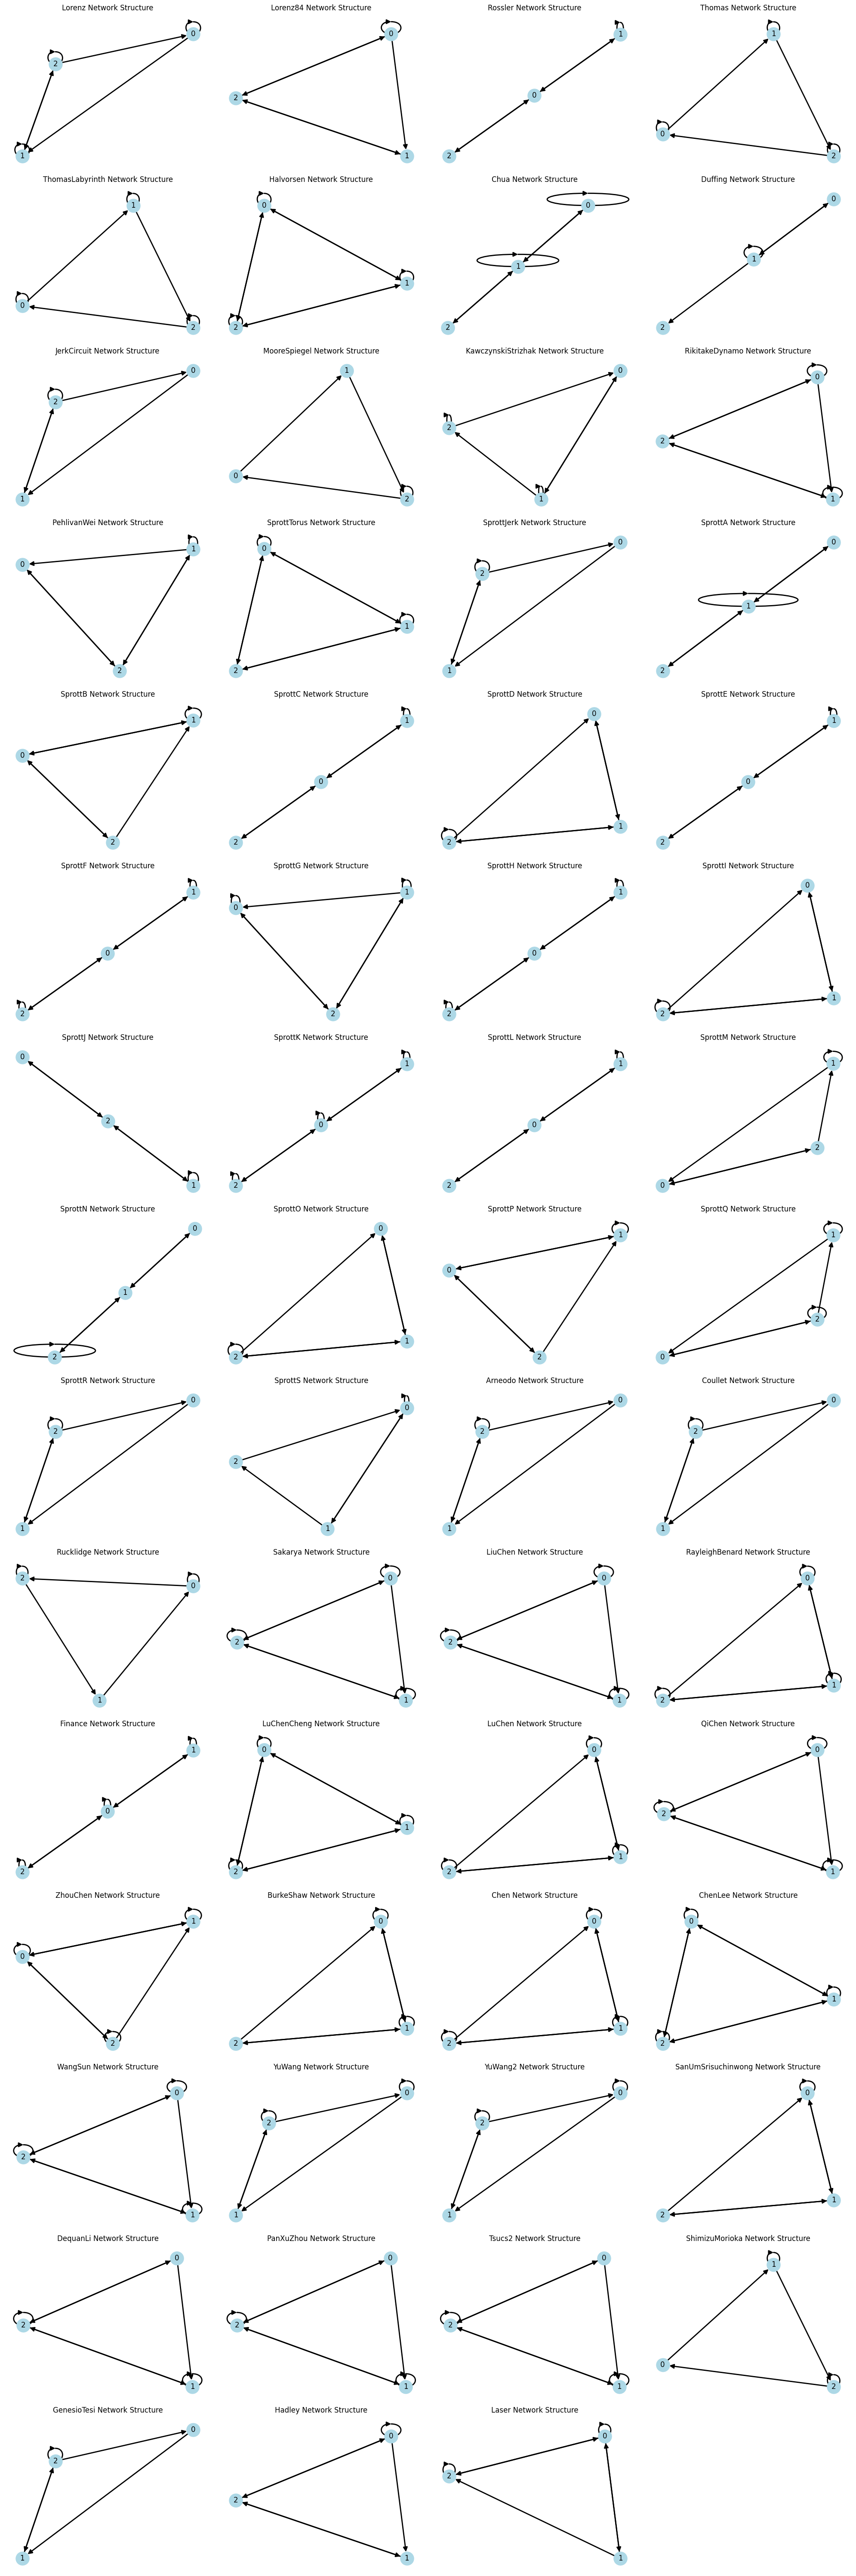

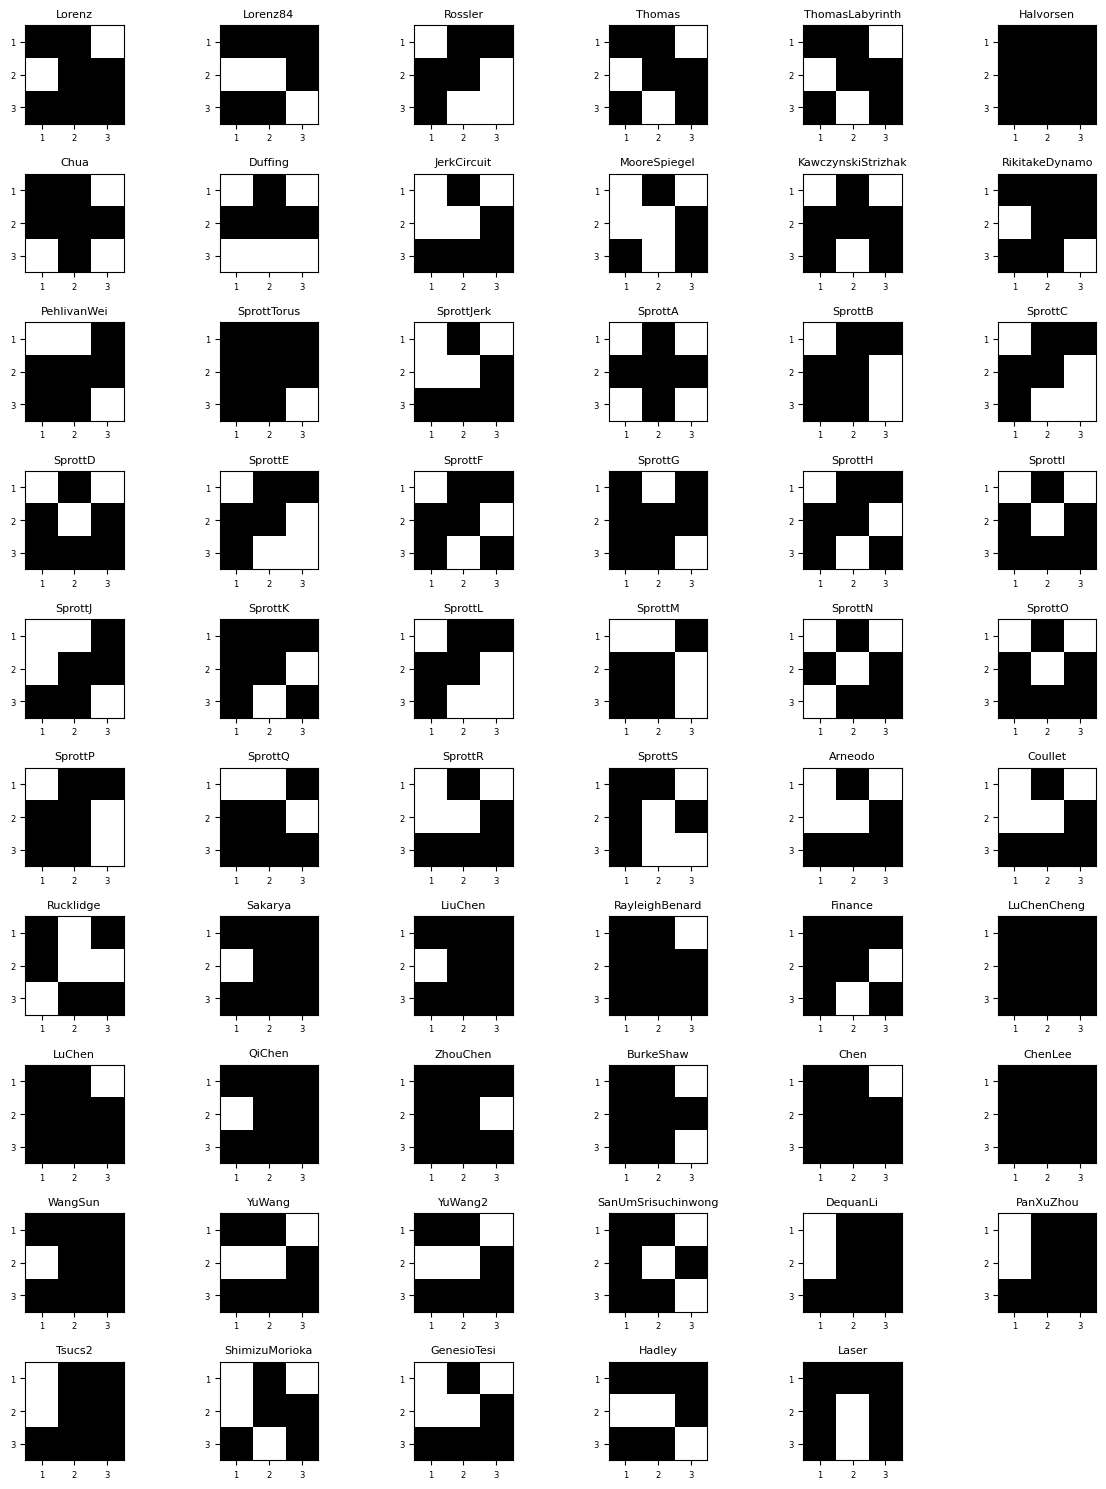

In [8]:
# Select systems with valid adjacency matrices
valid_systems = [s for s, A in res.items() 
                if isinstance(A, np.ndarray) and A.ndim == 2]

if valid_systems:
    # Visualize all systems
    # Calculate grid dimensions based on number of systems
    n_systems = len(valid_systems)
    n_cols = min(4, n_systems)  # Maximum 4 columns
    n_rows = (n_systems + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_systems == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, system in enumerate(valid_systems):
        if i < len(axes):
            A = res[system]
            G = nx.DiGraph(A)
            
            # Draw the network
            ax = axes[i]
            pos = nx.spring_layout(G, seed=42)
            nx.draw_networkx(G, pos, ax=ax, node_color='lightblue', 
                             node_size=500, arrows=True, 
                             arrowsize=15, width=2)
            ax.set_title(f"{system} Network Structure")
            ax.axis('off')
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()
    
if valid_systems:
    # Visualize all systems as binary adjacency matrices
    # Calculate grid dimensions based on number of systems
    n_systems = len(valid_systems)
    n_cols = min(6, n_systems)  # More columns for smaller plots
    n_rows = (n_systems + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*n_cols, 1.5*n_rows))
    if n_systems == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, system in enumerate(valid_systems):
        if i < len(axes):  # Safety check
            A = res[system]
            
            # Draw the adjacency matrix as a binary heatmap
            ax = axes[i]
            im = ax.imshow(A, cmap='binary', interpolation='none', vmin=0, vmax=1)
            
            # Add labels but with smaller font
            n_nodes = A.shape[0]
            ax.set_xticks(np.arange(n_nodes))
            ax.set_yticks(np.arange(n_nodes))
            ax.set_xticklabels(range(1, n_nodes+1), fontsize=6)
            ax.set_yticklabels(range(1, n_nodes+1), fontsize=6)
            ax.set_title(f"{system}", fontsize=8)
            ax.grid(False)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()
